## 7월 25일 EDA


In [4]:
import  pandas  as  pd
import  numpy   as  np
import  matplotlib  as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
%matplotlib inline

In [6]:
plt.style.use('ggplot')

In [7]:
mpl.rcParams['axes.unicode_minus'] = False

In [12]:
data = pd.read_csv("data/crypto-markets.csv", parse_dates=["date"])
data.shape

(785024, 13)

In [13]:
data.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,785024.000000,7.850240e+05,7.850240e+05,7.850240e+05,7.850240e+05,7.850240e+05,7.850240e+05,7.850240e+05,7.850240e+05
mean,842.650876,3.550859e+02,4.233219e+02,2.980848e+02,3.536499e+02,7.459260e+06,1.563100e+08,-inf,1.252368e+02
std,452.624872,1.403939e+04,1.733459e+04,1.157055e+04,1.396510e+04,1.817992e+08,3.478147e+09,NaN,7.379191e+03
min,1.000000,2.500000e-09,3.200000e-09,9.200000e-14,0.000000e+00,0.000000e+00,0.000000e+00,-inf,0.000000e+00
25%,472.000000,1.117000e-03,1.305000e-03,9.630000e-04,1.119000e-03,6.400000e+01,1.294600e+04,1.552000e-01,0.000000e+00
50%,910.000000,1.723150e-02,1.980350e-02,1.511100e-02,1.723000e-02,1.201000e+03,1.932045e+05,4.342000e-01,0.000000e+00
75%,1185.000000,2.159187e-01,2.424478e-01,1.915900e-01,2.156592e-01,3.963225e+04,3.635550e+06,7.586000e-01,4.000000e-02
max,1645.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.261410e+11,1.000000e+00,1.770563e+06


In [14]:
data.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32


In [19]:
data = data.sort_values(['name'] ,ascending=True)
data.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
295465,vtorrent,VTR,vTorrent,2015-02-26,702,0.000688,0.000689,0.000679,0.000686,10.0,0.0,0.7000,0.00
296035,vtorrent,VTR,vTorrent,2017-01-22,702,0.051040,0.054864,0.045990,0.046190,884.0,552042.0,0.0225,0.01
295445,vtorrent,VTR,vTorrent,2015-02-06,702,0.000868,0.000986,0.000868,0.000947,6.0,0.0,0.6695,0.00
295659,vtorrent,VTR,vTorrent,2015-10-16,702,0.001679,0.001698,0.001660,0.001675,0.0,0.0,0.3947,0.00
295402,vtorrent,VTR,vTorrent,2014-12-25,702,0.001449,0.001771,0.001121,0.001122,819.0,0.0,0.0015,0.00


## 일목균형지표

## 전환선 = 과거 9일 동안의 (최고가 + 최저가) / 2
## 기준선 = 과거 26일 동안의 (최고가 + 최저가) / 2
## 선행 스팬 1 = (기준선 + 전환선) / 2 를 26일 미래로 이동시킨것
## 선행 스팬 2 = 과거 52일 동안의 (최고가 + 최저가) / 2 를 26일 미래로 이동시킨것
## 후행 스팬 = 당일의 종종가를 당일 포함 26일 과거로 이동 시킨것. t day가 현재면 t - 25 에 배치

In [131]:
data = pd.read_csv("data/crypto-markets.csv")
data.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32


In [132]:
data['date'] = pd.to_datetime(data['date'])
data.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32


In [264]:
btc = data.loc[data['symbol']=='BTC', :]
btc.head

<bound method NDFrame.head of          slug symbol     name       date  ranknow     open     high      low  \
0     bitcoin    BTC  Bitcoin 2013-04-28        1   135.30   135.98   132.10   
1     bitcoin    BTC  Bitcoin 2013-04-29        1   134.44   147.49   134.00   
2     bitcoin    BTC  Bitcoin 2013-04-30        1   144.00   146.93   134.05   
3     bitcoin    BTC  Bitcoin 2013-05-01        1   139.00   139.89   107.72   
4     bitcoin    BTC  Bitcoin 2013-05-02        1   116.38   125.60    92.28   
5     bitcoin    BTC  Bitcoin 2013-05-03        1   106.25   108.13    79.10   
6     bitcoin    BTC  Bitcoin 2013-05-04        1    98.10   115.00    92.50   
7     bitcoin    BTC  Bitcoin 2013-05-05        1   112.90   118.80   107.14   
8     bitcoin    BTC  Bitcoin 2013-05-06        1   115.98   124.66   106.64   
9     bitcoin    BTC  Bitcoin 2013-05-07        1   112.25   113.44    97.70   
10    bitcoin    BTC  Bitcoin 2013-05-08        1   109.60   115.78   109.60   
11    bitc

## 전환선 

In [487]:
conversion = [ (max(btc['high'][0+i:9+i]) + min(btc['low'][0+i:9+i]))/2for i in range(btc.shape[0]) ]
pd_conversion = pd.DataFrame(conversion)
pd_conversion["date"] = pd.to_datetime(data['date'][9:])

pd_conversion = pd_conversion.apply(lambda x: pd.Series(x.dropna().values))
pd_conversion.set_index('date')

#2013-05-24 to 2018-06-06
pd_conversion = pd_conversion[17:1857]
pd_conversion.set_index('date', inplace=True, drop=True)
pd_conversion

,0
date,
2013-05-24,115.215
2013-05-25,123.025
2013-05-26,125.210
2013-05-27,127.785
2013-05-28,127.785
2013-05-29,128.060
2013-05-30,128.605
2013-05-31,129.000
2013-06-01,129.550


## 기준선

In [489]:
guide = [ (max(btc['high'][0+i:26+i]) + min(btc['low'][0+i:26+i]))/2for i in range(btc.shape[0])]
pd_guide = pd.DataFrame(guide)
pd_guide["date"] = pd.to_datetime(data['date'][26:])
pd_guide = pd_guide.apply(lambda x: pd.Series(x.dropna().values))
pd_guide.set_index('date')

#2013-05-24 to 2018-06-06
pd_guide = pd_guide[:1840]
pd_guide.set_index('date', inplace=True, drop=True)
pd_guide

,0
date,
2013-05-24,113.295
2013-05-25,113.295
2013-05-26,113.015
2013-05-27,109.495
2013-05-28,107.550
2013-05-29,107.550
2013-05-30,114.250
2013-05-31,116.850
2013-06-01,116.850


## 전환선 & 기준선

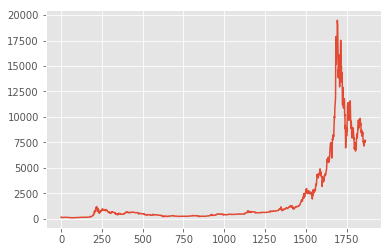

In [490]:
# BTC price data with Close
plt.plot(btc.iloc[:,8])
plt.show()

In [491]:
price = pd.DataFrame(btc['close'][26:])
price['date'] = pd.DataFrame(btc["date"][26:])
price.set_index('date', inplace=True, drop =True)

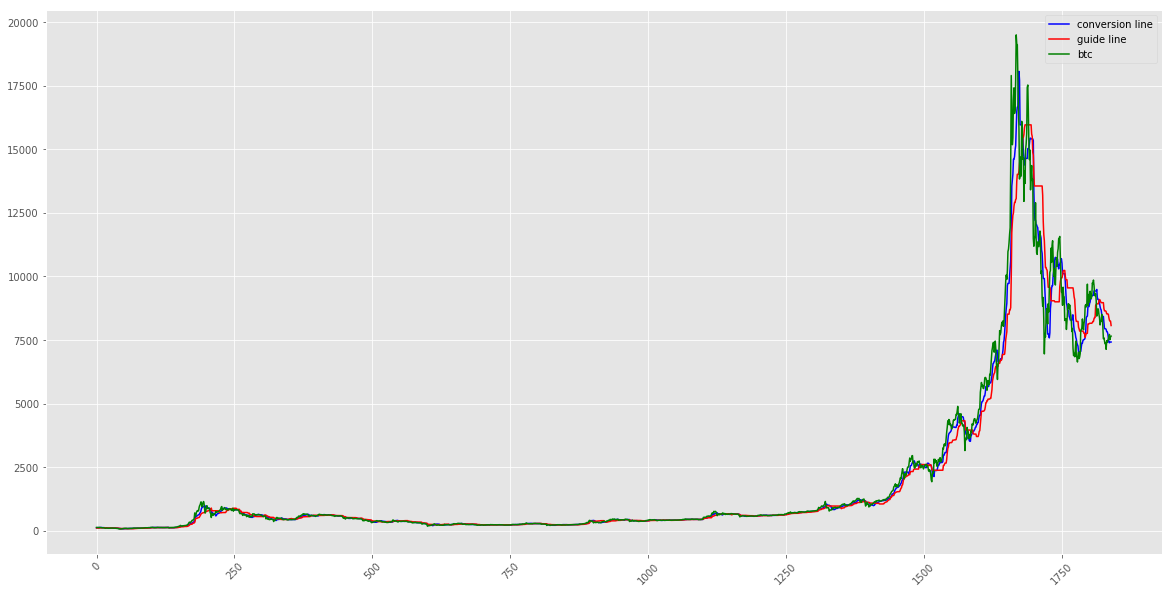

In [492]:
# conversion[0] 2013-05-24 to 2018-06-06
# guide[0] 2013-05-24 to 2018-06-06
# ====================================

view  =  pd_conversion.values.tolist()
view2 =  pd_guide.values.tolist()
view3 =  price.values.tolist()

plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.plot(view,  color ='blue' ,  label='conversion line')
plt.plot(view2, color ='red',    label='guide line')
plt.plot(view3, color = 'green', label='btc')
plt.legend()



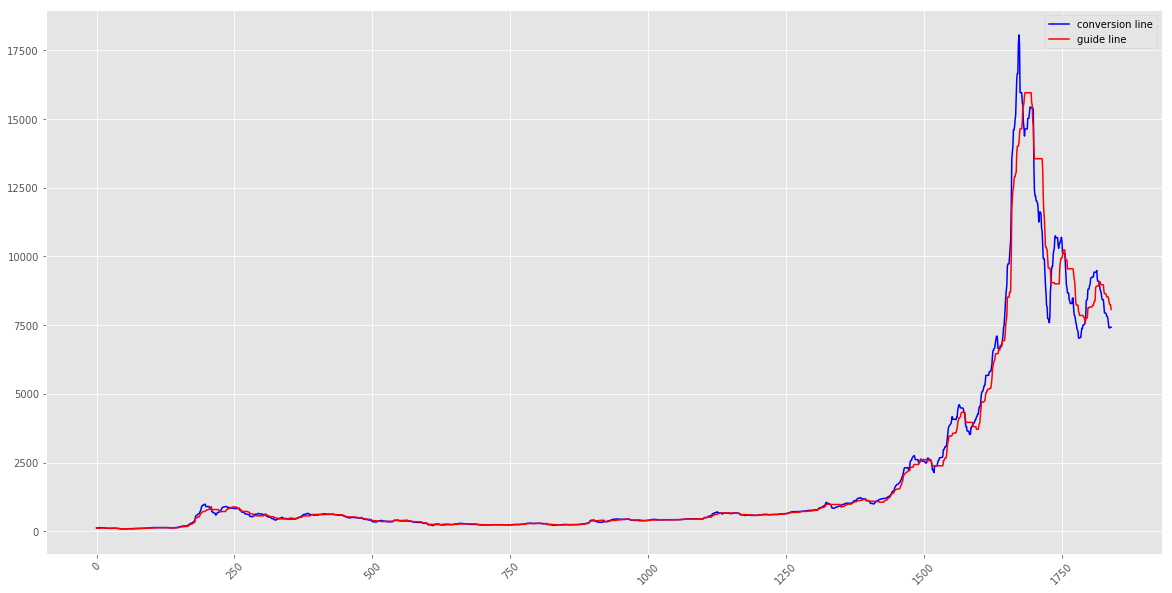

In [493]:


plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.plot(view,  color = 'blue' ,  label='conversion line')
plt.plot(view2, color = 'red'  ,  label='guide line')
#plt.plot(price, color = 'green',  label='btc')
plt.legend()


## 선행스팬 1

In [495]:
#선행 스팬 1 = (기준선 + 전환선) / 2 를 26일 미래로 이동시킨것
#2013-05-24 + 26 = 2013-06-19 시작
pd_conversion = pd_conversion.reset_index(drop=True)
pd_guide = pd_guide.reset_index(drop=True)

pred1 = (pd_conversion.iloc[:,0] + pd_guide.iloc[:,0])/2
pred1 = pd.DataFrame(pred1[:1814])
date = pd.DataFrame(data["date"][52:]).reset_index(drop=True)
pred1['date'] = date

pred1.set_index('date', inplace=True, drop=True)

pred1

,0
date,
2013-06-19,114.2550
2013-06-20,118.1600
2013-06-21,119.1125
2013-06-22,118.6400
2013-06-23,117.6675
2013-06-24,117.8050
2013-06-25,121.4275
2013-06-26,122.9250
2013-06-27,123.2000


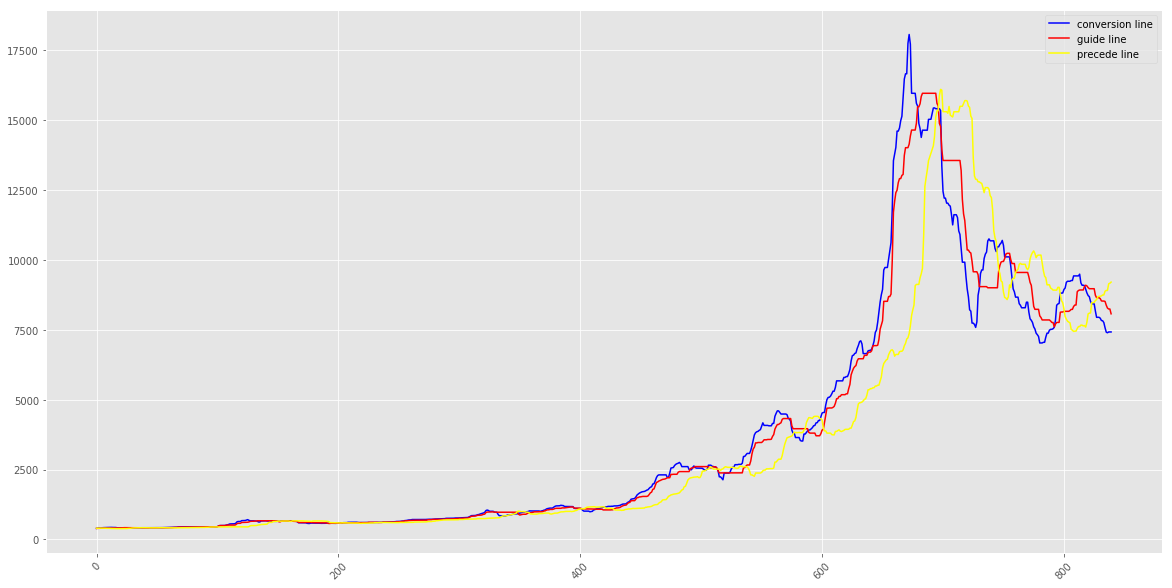

In [496]:
pred = pred1.values.tolist()

plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.plot(view[1000:],  color ='blue' ,label='conversion line')
plt.plot(view2[1000:],  color ='red', label='guide line')
plt.plot(pred[974:],  color = 'yellow' ,  label='precede line')
plt.legend()

In [484]:
pd_conversion[1000:,:]

,0
0,115.215
1,123.025
2,125.210
3,127.785
4,127.785
5,128.060
6,128.605
7,129.000
8,129.550
9,130.350


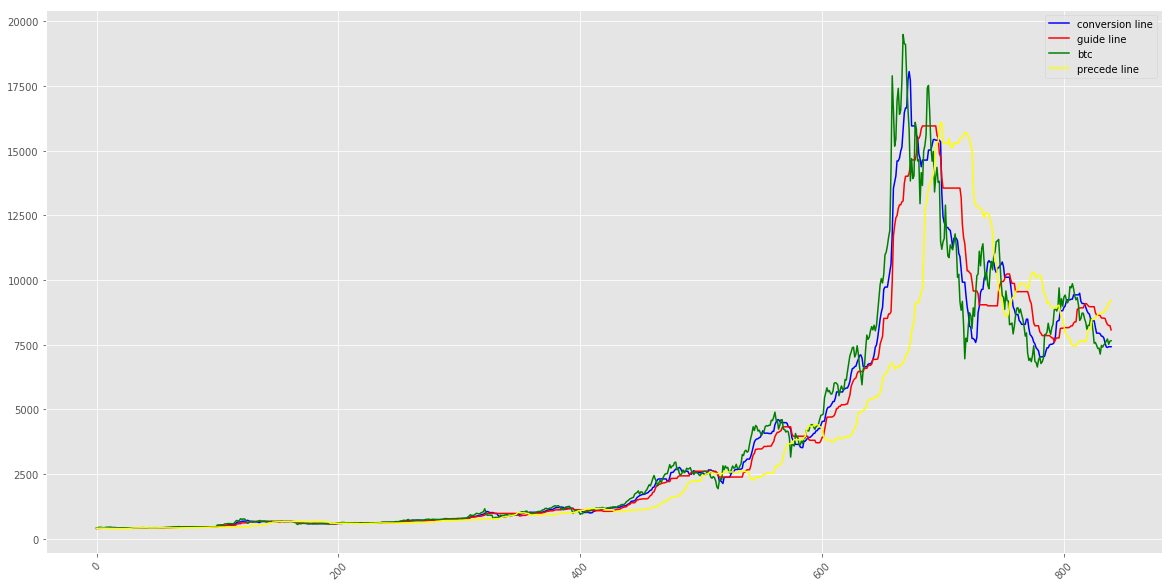

In [450]:
#2013-06-19 to 2018-06-06

pred = pred1.values.tolist()

plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.plot(view[1000:],  color ='blue' ,label='conversion line')
plt.plot(view2[1000:],  color ='red', label='guide line')
plt.plot(view3[1000:], color = 'green', label='btc')
plt.plot(pred[974:],  color = 'yellow' ,  label='precede line')
plt.legend()


## 후행스팬 : 당일의 종가를 당일 포함 26일 과거로 이동 시킨것. t day가 현재면 t - 25 에 배치

In [497]:
follow = pd.DataFrame(btc['close'][25:])
follow = pd.DataFrame(follow).reset_index(drop=True)
follow['date'] = pd.to_datetime(data['date'])
follow.set_index('date', inplace=True, drop=True)
follow = follow[52:]
follow

,close
date,
2013-06-19,94.69
2013-06-20,98.40
2013-06-21,97.45
2013-06-22,98.50
2013-06-23,90.58
2013-06-24,92.17
2013-06-25,89.39
2013-06-26,90.76
2013-06-27,91.61


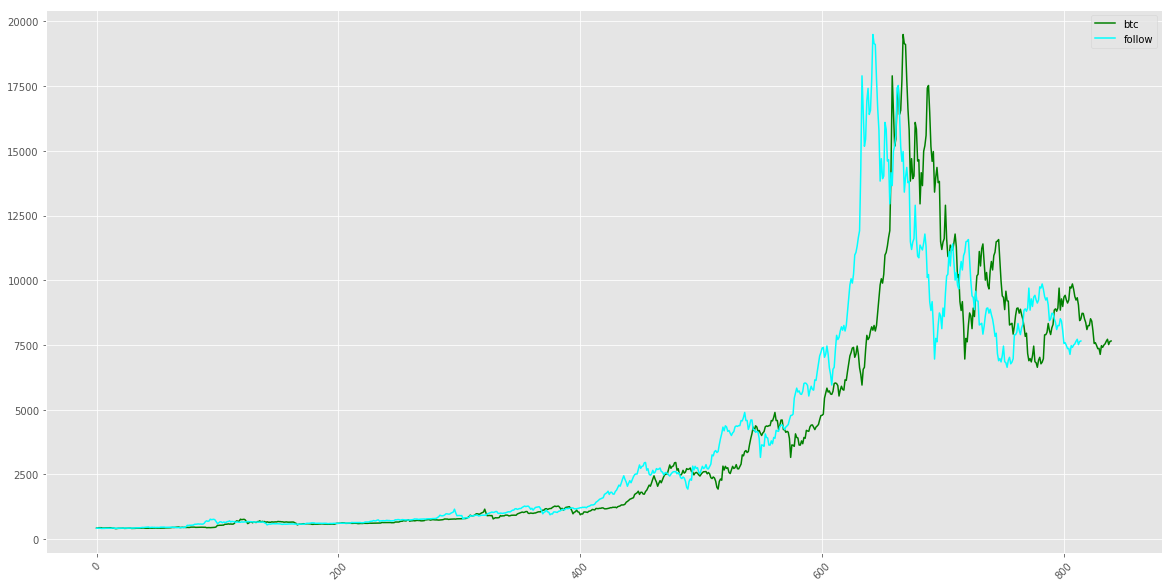

In [504]:
view4 = follow.values.tolist()

plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.plot(view3[1000:], color = 'green', label='btc')
plt.plot(view4[974:] , color = 'cyan', label='follow')
plt.legend()

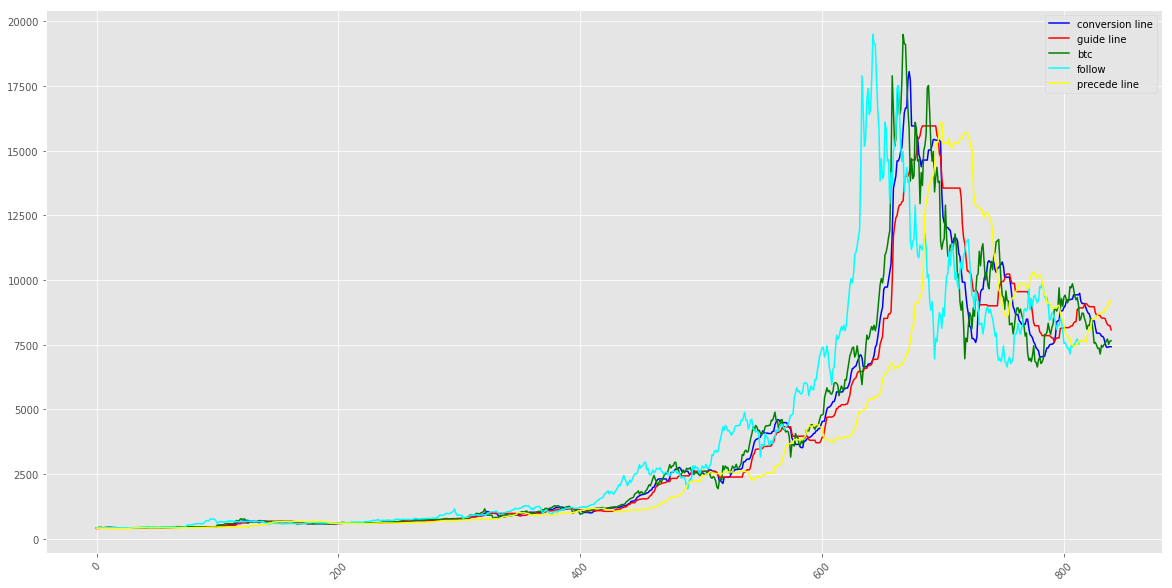

In [505]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.plot(view[1000:],  color ='blue' ,label='conversion line')
plt.plot(view2[1000:],  color ='red', label='guide line')
plt.plot(view3[1000:], color = 'green', label='btc')
plt.plot(view4[974:] , color = 'cyan', label='follow')
plt.plot(pred[974:],  color = 'yellow' ,  label='precede line')
plt.legend()

## 선행스팬 2 : 과거 52일 동안의 (최고가 + 최저가) / 2 를 26일 미래로 이동시킨것
